In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
import matplotlib
matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'
%matplotlib inline

## Histogram Equalization for Grayscale Images

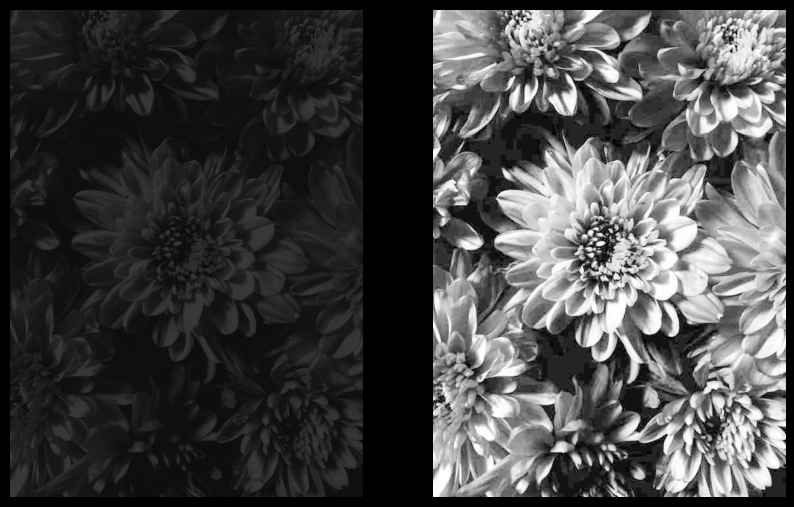

In [66]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

img = cv2.imread(DATA_PATH+"\images\dark-flowers.jpg", cv2.IMREAD_GRAYSCALE)

imEq = cv2.equalizeHist(img)

plt.figure()

ax = plt.subplot(121)
plt.imshow(img, vmin=0, vmax=255)
ax.axis('off')

ax = plt.subplot(122)
plt.imshow(imEq, vmin=0, vmax=255)
ax.axis('off')
plt.show()

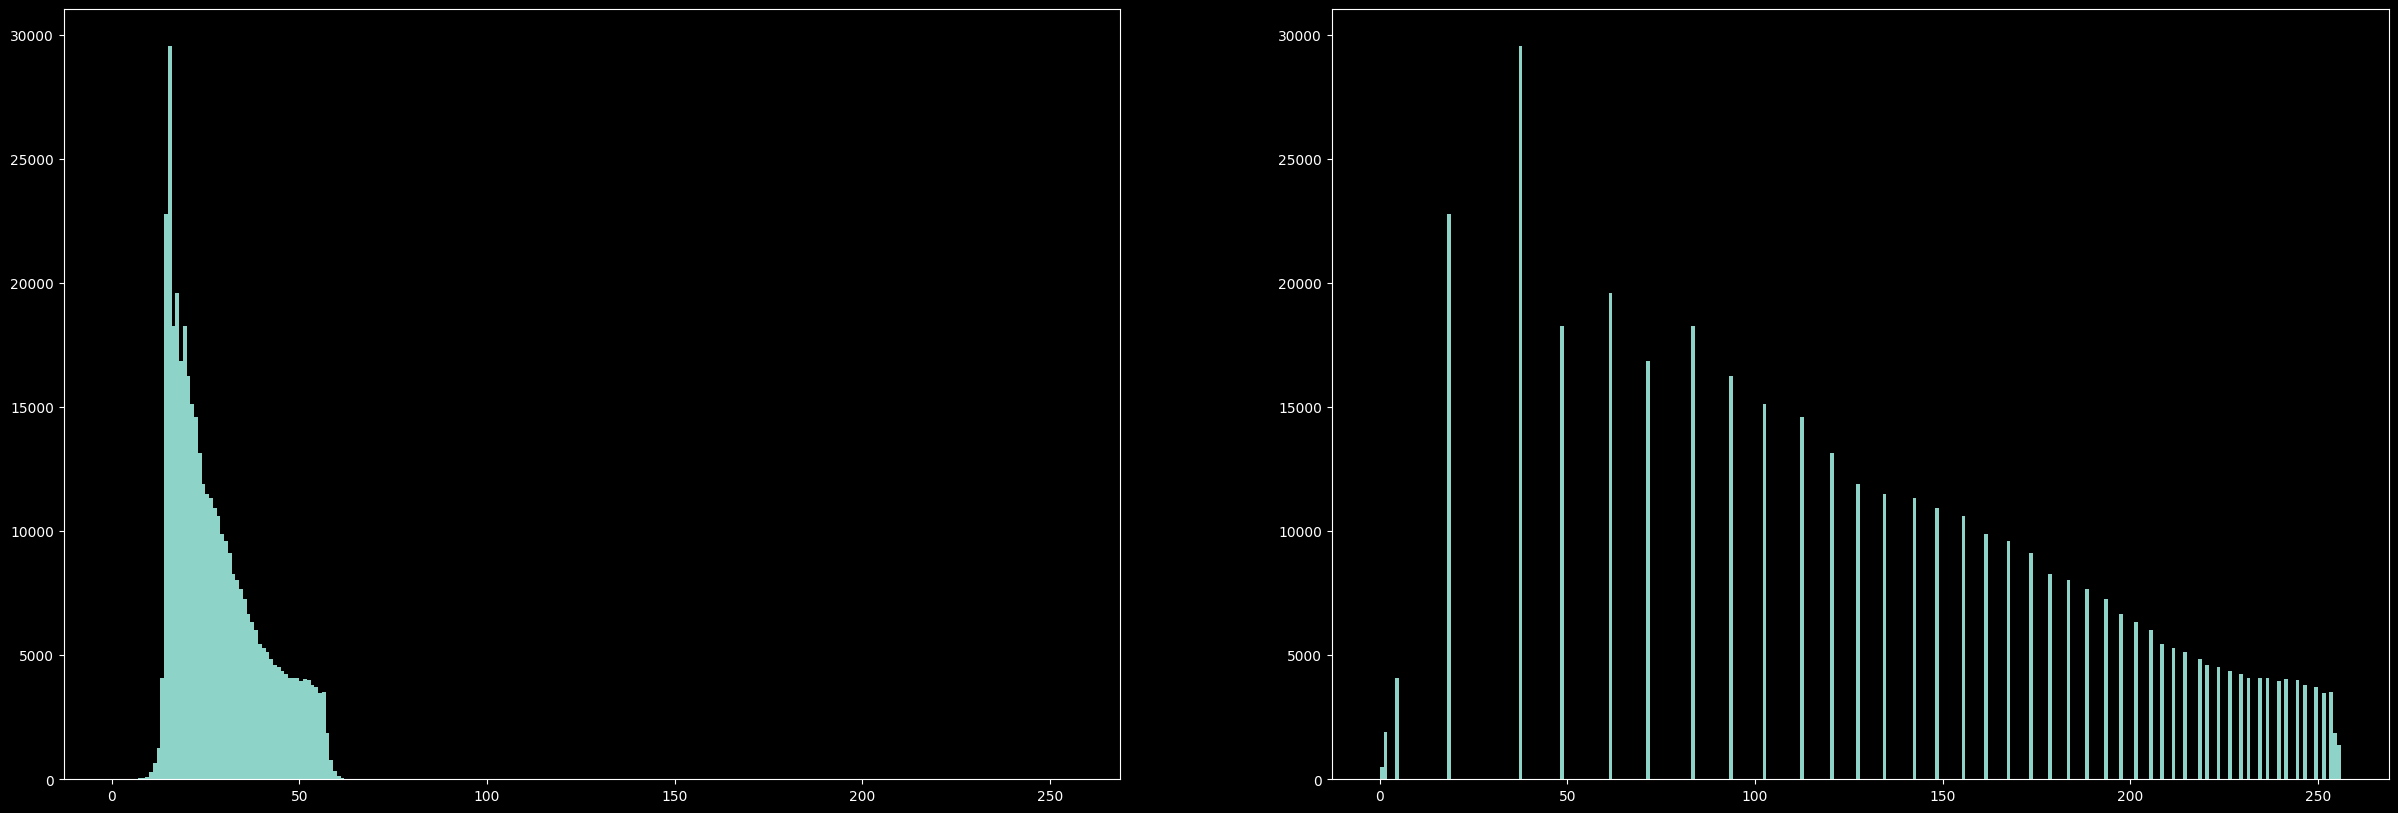

In [78]:
plt.figure(figsize=(30,10))
n_bins = 256
plt.subplot(121)
plt.hist(img.ravel(), n_bins, [0, 256])

plt.subplot(122)
plt.hist(imEq.ravel(), n_bins, [0, 256])
plt.show()

## Histogram Equalization for Color Images

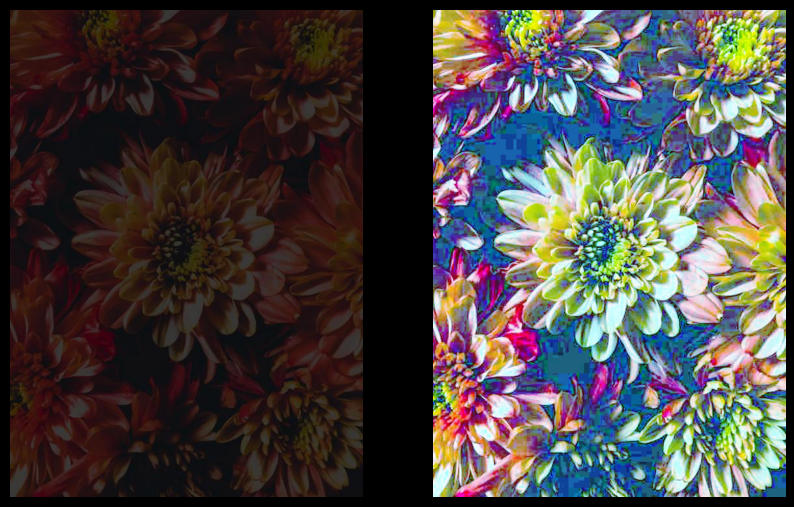

In [65]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

img = cv2.imread(DATA_PATH+"\images\dark-flowers.jpg")
imEq = np.zeros_like(img)

for chanel in range(0,3):
    imEq[:,:,chanel] = cv2.equalizeHist(img[:,:, chanel])

plt.figure()

ax = plt.subplot(121)
plt.imshow(img[:,:,::-1], vmin=0, vmax=255)
ax.axis('off')

ax = plt.subplot(122)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.axis('off')
plt.show()

## Right Way

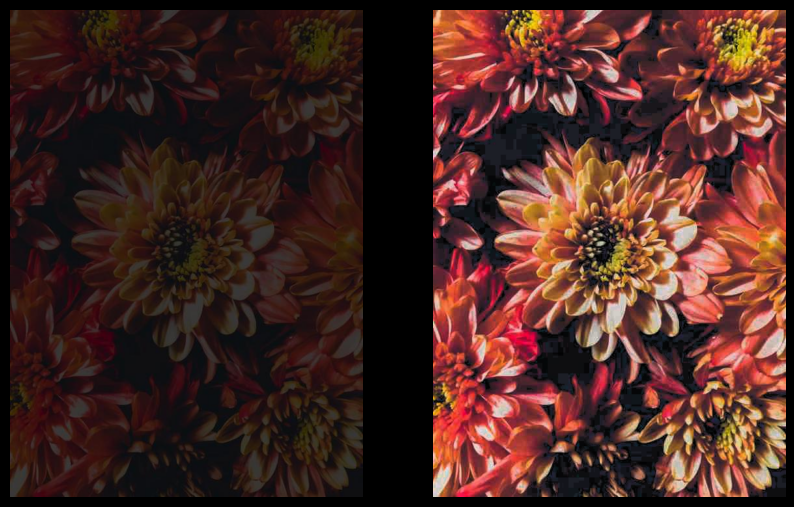

In [64]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

img = cv2.imread(DATA_PATH+"\images\dark-flowers.jpg")

imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imghsv[:,:,2] = cv2.equalizeHist(imghsv[:,:,2])

imEq = cv2.cvtColor(imghsv, cv2.COLOR_HSV2BGR)

plt.figure()

ax = plt.subplot(121)
plt.imshow(img[:,:,::-1], vmin=0, vmax=255)
ax.axis('off')

ax = plt.subplot(122)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.axis('off')
plt.show()

## Advanced Histogram (CLAHE)

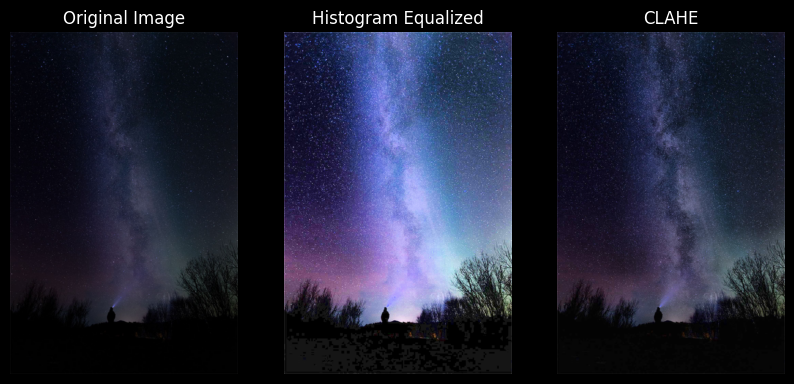

In [83]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

img = cv2.imread(DATA_PATH+r"\images\night-sky.jpg")

imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imhsvCLAHE = imghsv.copy()


imghsv[:,:,2] = cv2.equalizeHist(imghsv[:,:,2])
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imhsvCLAHE[:,:,2] = clahe.apply(imhsvCLAHE[:,:,2])

imEq = cv2.cvtColor(imghsv, cv2.COLOR_HSV2BGR)
imEqCLAHE = cv2.cvtColor(imhsvCLAHE, cv2.COLOR_HSV2BGR)

plt.figure()

ax = plt.subplot(131)
plt.imshow(img[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')

ax = plt.subplot(132)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

ax = plt.subplot(133)
plt.imshow(imEqCLAHE[:,:,::-1], vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')
plt.show()

## Color Adjustment

In [121]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"
file_name = DATA_PATH+r"\images\girl.jpg"

original = cv2.imread(file_name)
img = np.copy(original)

In [122]:
origValue = np.array([0,50, 100, 150, 200, 255])

redCruve = np.array([0, 80, 150, 190, 220, 255])
blueCruve = np.array([0, 20, 40, 75, 150, 255])

fullRange = np.arange(0, 256)

redLUT = np.interp(fullRange, origValue, redCruve)
blueLUT = np.interp(fullRange, origValue, blueCruve)

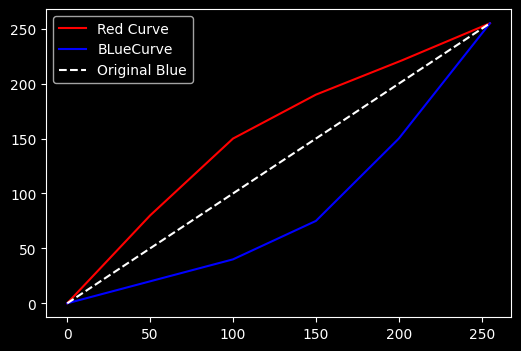

In [123]:
plt.figure(figsize=(6,4))
plt.plot(redLUT, color = "red",  label='Red Curve')
plt.plot(blueLUT, color = "blue",  label='BLueCurve')
plt.plot(fullRange, color = "white", linestyle='--',  label='Original Blue')
plt.legend()
plt.show()

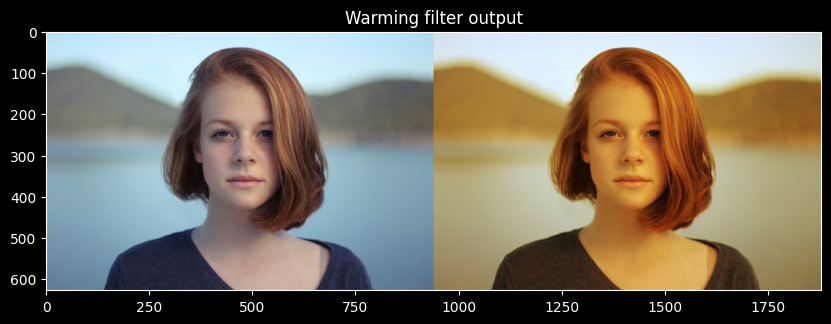

In [124]:
blueChannel = img[:,:, 0]
blueChannel = cv2.LUT(blueChannel, blueLUT)
img[:,:,0] = blueChannel

redChannel = img[:,:, 2]
redChannel = cv2.LUT(redChannel, redLUT)
img[:,:,2] = redChannel

combined = np.hstack([original, img])

plt.imshow(combined[:,:,::-1])
plt.title("Warming filter output")
plt.show()

### Cooling Filter Code

In [145]:
original = cv2.imread(file_name)
img = np.copy(original)

In [146]:
origValue = np.array([0, 50, 100, 150, 200, 255])

redCruve = np.array([0, 20,  40,  75, 150, 255])
blueCruve = np.array([0, 80, 150, 190, 220, 255])

fullRange = np.arange(0,256)

redLUT = np.interp(fullRange, origValue, redCruve)
blueLUT = np.interp(fullRange, origValue, blueCruve)

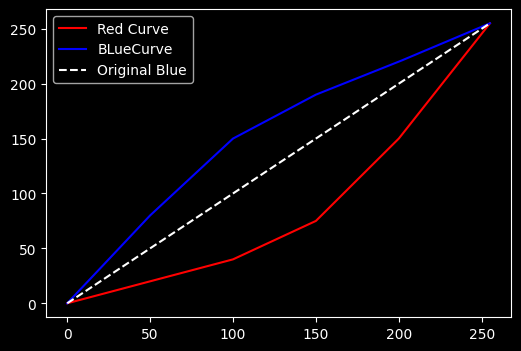

In [147]:
plt.figure(figsize=(6,4))
plt.plot(redLUT, color = "red",  label='Red Curve')
plt.plot(blueLUT, color = "blue",  label='BLueCurve')
plt.plot(fullRange, color = "white", linestyle='--',  label='Original Blue')
plt.legend()
plt.show()

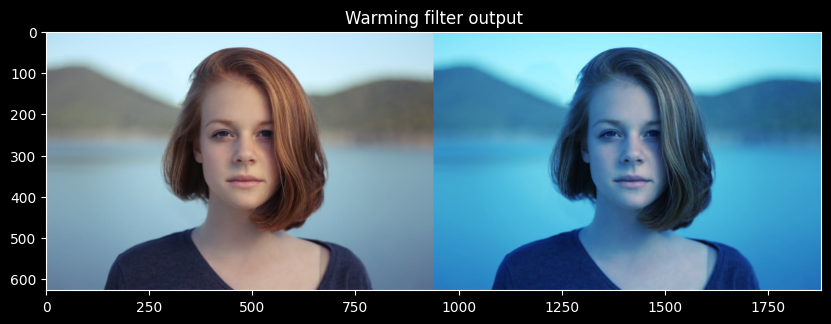

In [148]:
blueChannel = img[:,:, 0]
blueChannel = cv2.LUT(blueChannel, blueLUT)
img[:,:,0] = blueChannel

redChannel = img[:,:, 2]
redChannel = cv2.LUT(redChannel, redLUT)
img[:,:,2] = redChannel

combined = np.hstack([original,img])

plt.imshow(combined[:,:,::-1])
plt.title("Warming filter output")
plt.show()

https://docs.opencv.org/4.1.0/de/db2/tutorial_py_table_of_contents_histograms.html
https://en.wikipedia.org/wiki/Image_histogram
https://en.wikipedia.org/wiki/Histogram_equalization
https://www.tutorialspoint.com/dip/histogram_equalization.htm
https://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/
https://hackernoon.com/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23
https://www.youtube.com/watch?v=F9TZb0XBow0
https://www.learnopencv.com/applycolormap-for-pseudocoloring-in-opencv-c-python/
https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
https://docs.opencv.org/4.1.0/d3/dc1/tutorial_basic_linear_transform.html